In [49]:
# import my libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [50]:
df = pd.read_csv("train_without_null.csv")

In [51]:
df.isnull().sum()

SalesID               0
SalePrice             0
MachineID             0
ModelID               0
datasource            0
auctioneerID          0
YearMade              0
saledate              0
fiModelDesc           0
fiBaseModel           0
fiProductClassDesc    0
state                 0
ProductGroup          0
ProductGroupDesc      0
Enclosure             0
Hydraulics            0
dtype: int64

In [52]:
df.dtypes

SalesID                 int64
SalePrice               int64
MachineID               int64
ModelID                 int64
datasource              int64
auctioneerID          float64
YearMade                int64
saledate               object
fiModelDesc            object
fiBaseModel            object
fiProductClassDesc     object
state                  object
ProductGroup           object
ProductGroupDesc       object
Enclosure              object
Hydraulics             object
dtype: object

as we see `saledate` have a problem that it not take the correct dtype

In [53]:
df["saledate"].head()

0    11/16/2006 0:00
1     3/26/2004 0:00
2     2/26/2004 0:00
3     5/19/2011 0:00
4     7/23/2009 0:00
Name: saledate, dtype: object

In [54]:
# Convert 'saledate' to datetime
df['saledate'] = pd.to_datetime(df['saledate'])
df['saledate'].dtype

dtype('<M8[ns]')

**Let's do some feature engineering on it to help in prediction of saleprice**

In [55]:

# Extracting year, month, and day features
df['sale_year'] = df['saledate'].dt.year
df['sale_month'] = df['saledate'].dt.month
df['sale_day'] = df['saledate'].dt.day

# Extracting day of the week (Monday=0, Sunday=6)
df['sale_dayofweek'] = df['saledate'].dt.dayofweek

In [56]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,saledate,fiModelDesc,fiBaseModel,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Enclosure,Hydraulics,sale_year,sale_month,sale_day,sale_dayofweek
0,1139246,66000,999089,3157,121,3.0,2004,2006-11-16,521D,521,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,EROPS w AC,2 Valve,2006,11,16,3
1,1139248,57000,117657,77,121,3.0,1996,2004-03-26,950FII,950,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,EROPS w AC,2 Valve,2004,3,26,4
2,1139249,10000,434808,7009,121,3.0,2001,2004-02-26,226,226,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,OROPS,Auxiliary,2004,2,26,3
3,1139251,38500,1026470,332,121,3.0,2001,2011-05-19,PC120-6E,PC120,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,EROPS w AC,2 Valve,2011,5,19,3
4,1139253,11000,1057373,17311,121,3.0,2007,2009-07-23,S175,S175,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,EROPS,Auxiliary,2009,7,23,3


In [57]:
# lets drop this columns 
df = df.drop("saledate", axis=1)

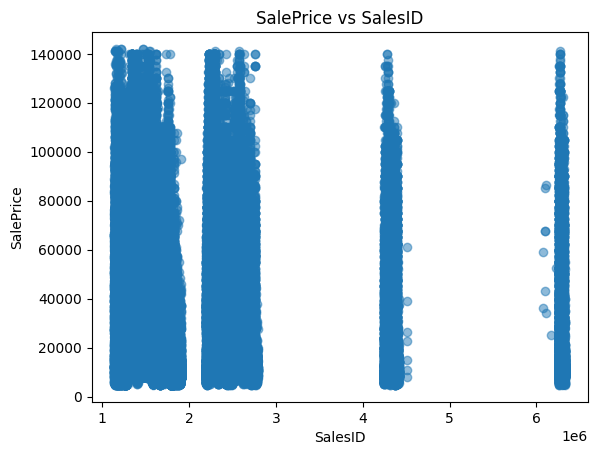

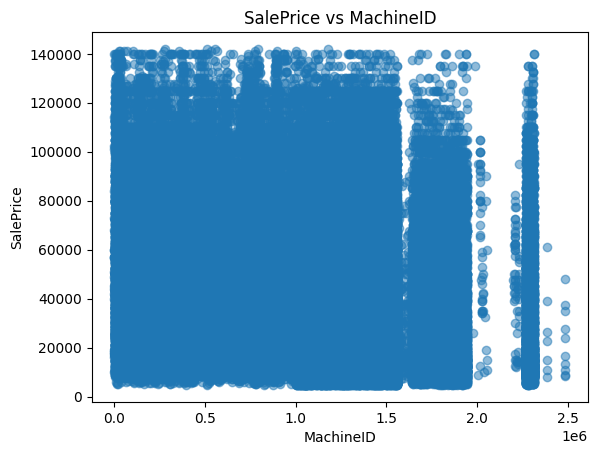

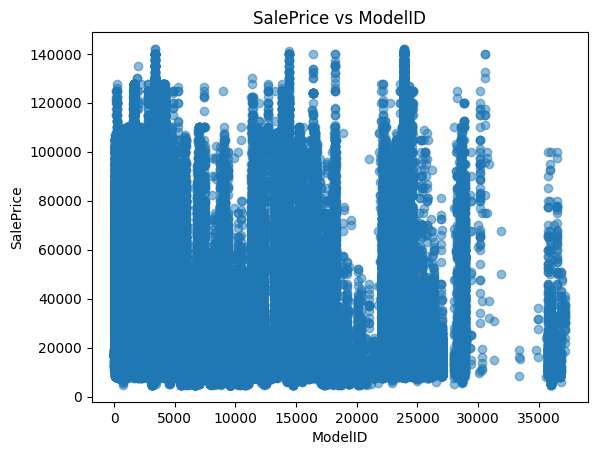

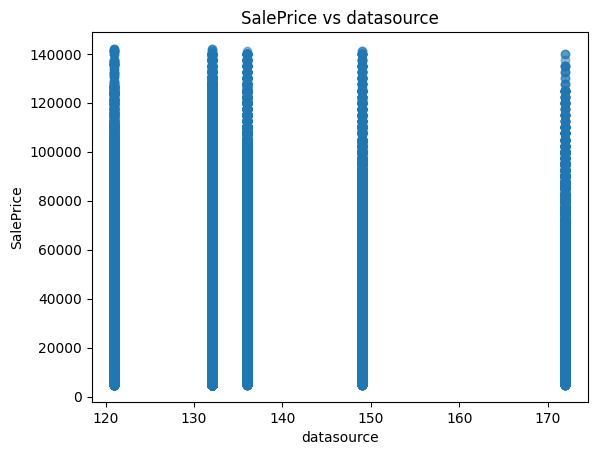

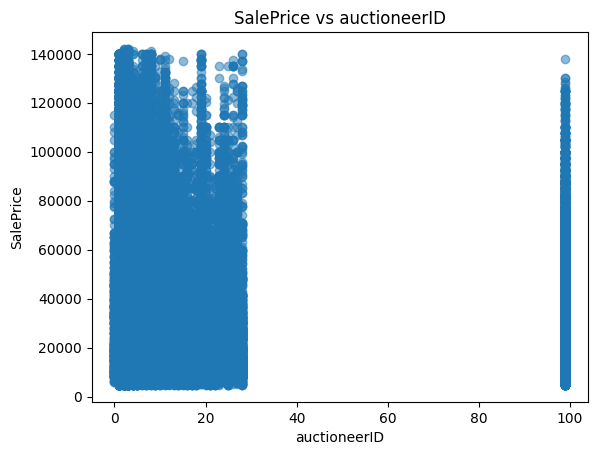

In [58]:
# Features to investigate
features_to_investigate = ['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID']

# Scatter plots
for feature in features_to_investigate:
    plt.scatter(df[feature], df['SalePrice'], alpha=0.5)
    plt.title(f'SalePrice vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()


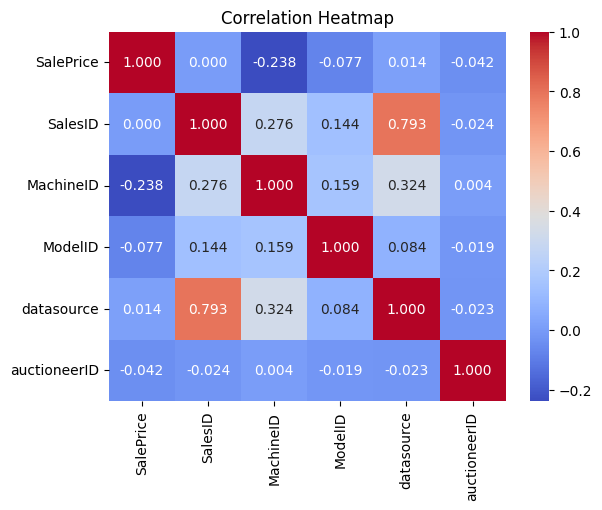

In [59]:
# Correlation matrix heatmap
correlation_matrix = df[['SalePrice', 'SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Heatmap')
plt.show()


### insights from above analysis 
at first, we should know this genral rules of correlation:
- |r| > 0.7: Strong correlation
- 0.5 < |r| ≤ 0.7: Moderate correlation
- 0.3 < |r| ≤ 0.5: Weak correlation
- |r| ≤ 0.3: Weak or no correlation

**so based on that we can say ['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID'] not correlated with `saleprice` which is the target feature which we want to predict**

In [60]:
# drop this columns from the dataframe
df = df.drop(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID'], axis=1)

In [61]:
df.head()

,SalePrice,YearMade,fiModelDesc,fiBaseModel,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Enclosure,Hydraulics,sale_year,sale_month,sale_day,sale_dayofweek
0,66000,2004,521D,521,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,EROPS w AC,2 Valve,2006,11,16,3
1,57000,1996,950FII,950,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,EROPS w AC,2 Valve,2004,3,26,4
2,10000,2001,226,226,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,OROPS,Auxiliary,2004,2,26,3
3,38500,2001,PC120-6E,PC120,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,EROPS w AC,2 Valve,2011,5,19,3
4,11000,2007,S175,S175,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,EROPS,Auxiliary,2009,7,23,3


In [62]:
df.columns

Index(['SalePrice', 'YearMade', 'fiModelDesc', 'fiBaseModel',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Enclosure', 'Hydraulics', 'sale_year', 'sale_month', 'sale_day',
       'sale_dayofweek'],
      dtype='object')

In [63]:
df.dtypes 

SalePrice              int64
YearMade               int64
fiModelDesc           object
fiBaseModel           object
fiProductClassDesc    object
state                 object
ProductGroup          object
ProductGroupDesc      object
Enclosure             object
Hydraulics            object
sale_year              int32
sale_month             int32
sale_day               int32
sale_dayofweek         int32
dtype: object

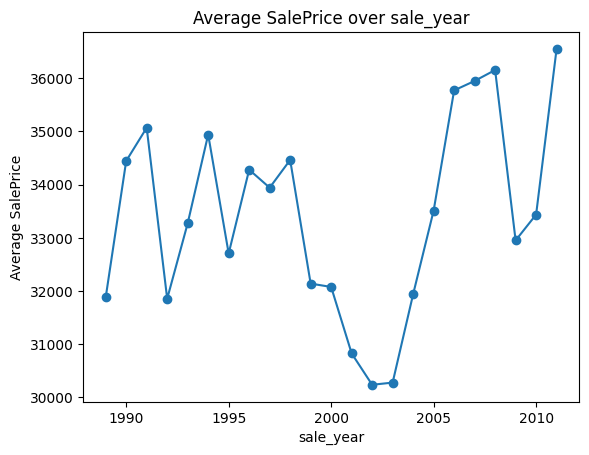

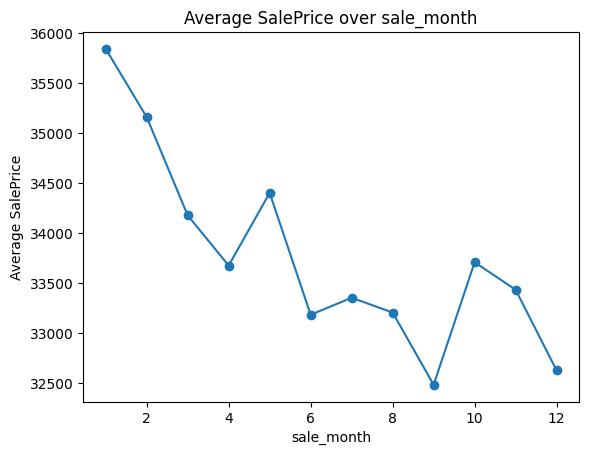

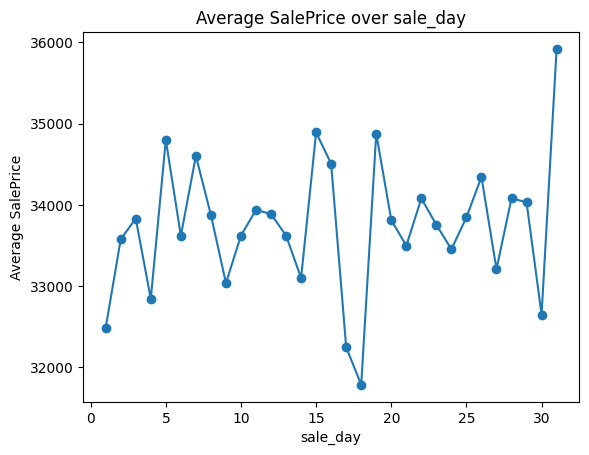

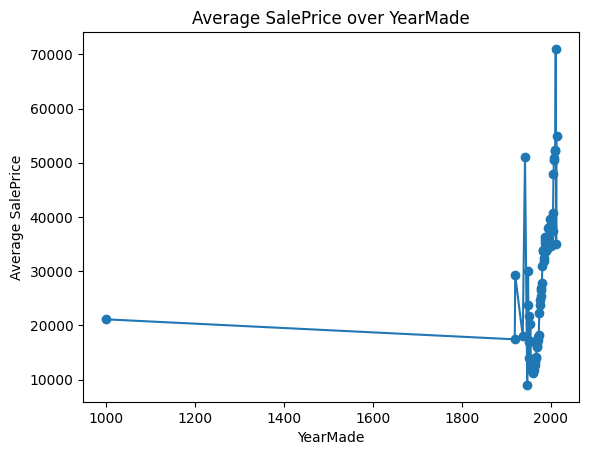

In [64]:
features_to_investigate = ['sale_year', 'sale_month', 'sale_day','YearMade']
# see how  this features are a time-related feature
for feature in features_to_investigate:
    plt.plot(df.groupby(feature)['SalePrice'].mean(), marker='o')
    plt.title(f'Average SalePrice over {feature}')
    plt.xlabel(feature)
    plt.ylabel('Average SalePrice')
    plt.show()


###  observe how 'SalePrice' changes over time features.
this is time series analysis so we take the trend from the data:
- there is trends in the all feature over the time
- there is outliers in `YearMade` columns so we will do some operation on it

In [65]:
df['YearMade'].describe()

count    305151.000000
mean       1892.032744
std         300.458254
min        1000.000000
25%        1982.000000
50%        1994.000000
75%        2000.000000
max        2013.000000
Name: YearMade, dtype: float64

In [66]:
# Count the number of rows where 'YearMade' is less than 1980
count_below_1980 = len(df[df['YearMade'] < 1950])
count_below_1980

31209

Bulldozer’s have been around since the early 1920’s and were one of the concepts behind the design of the first military tank. this from this [site](https://www.heavyequipmentschool.com/a-short-history-of-the-bulldozer/).

so will drop all below 1920.

In [67]:
# Create a boolean mask for rows with 'YearMade' less than 1920
mask = df['YearMade'] < 1920

# Drop rows based on the boolean mask
df_filtered = df[~mask]


In [68]:
df_filtered.head()

,SalePrice,YearMade,fiModelDesc,fiBaseModel,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Enclosure,Hydraulics,sale_year,sale_month,sale_day,sale_dayofweek
0,66000,2004,521D,521,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,EROPS w AC,2 Valve,2006,11,16,3
1,57000,1996,950FII,950,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,EROPS w AC,2 Valve,2004,3,26,4
2,10000,2001,226,226,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,OROPS,Auxiliary,2004,2,26,3
3,38500,2001,PC120-6E,PC120,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,EROPS w AC,2 Valve,2011,5,19,3
4,11000,2007,S175,S175,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,EROPS,Auxiliary,2009,7,23,3


In [69]:
# Count the number of rows where 'YearMade' is less than 1920
count_below_1920 = len(df_filtered[df_filtered['YearMade'] < 1920])
count_below_1920

0

In [70]:
df = df_filtered

**Let's see the categorical feature**

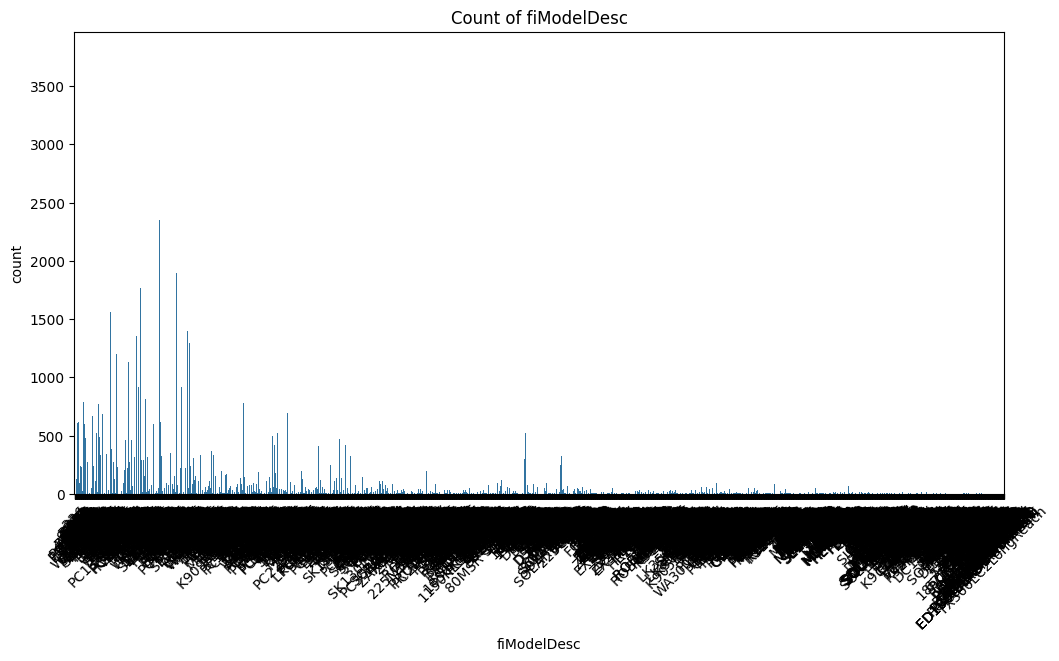

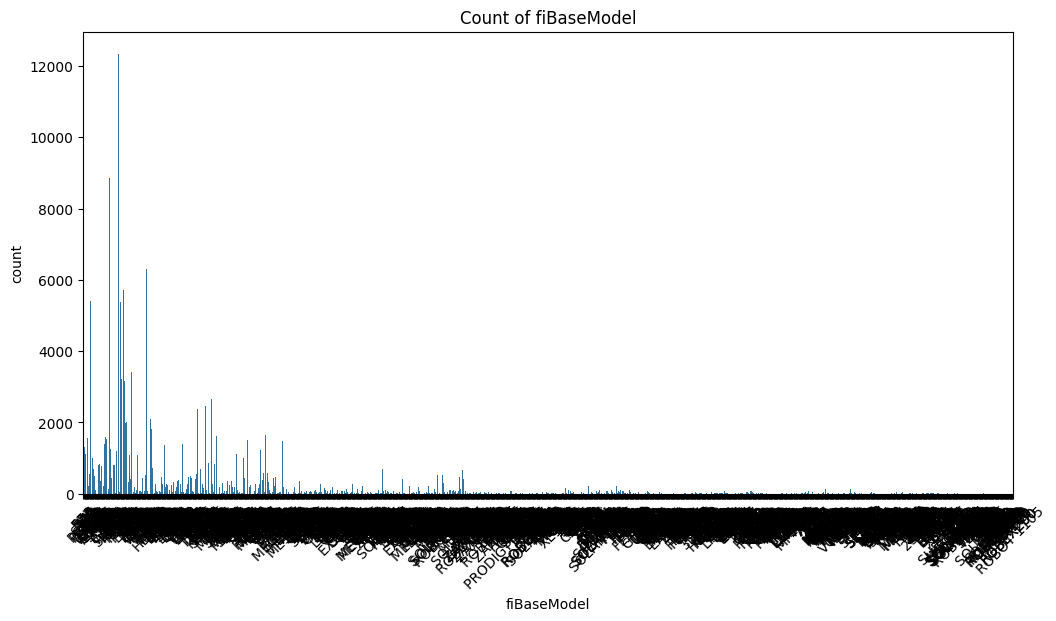

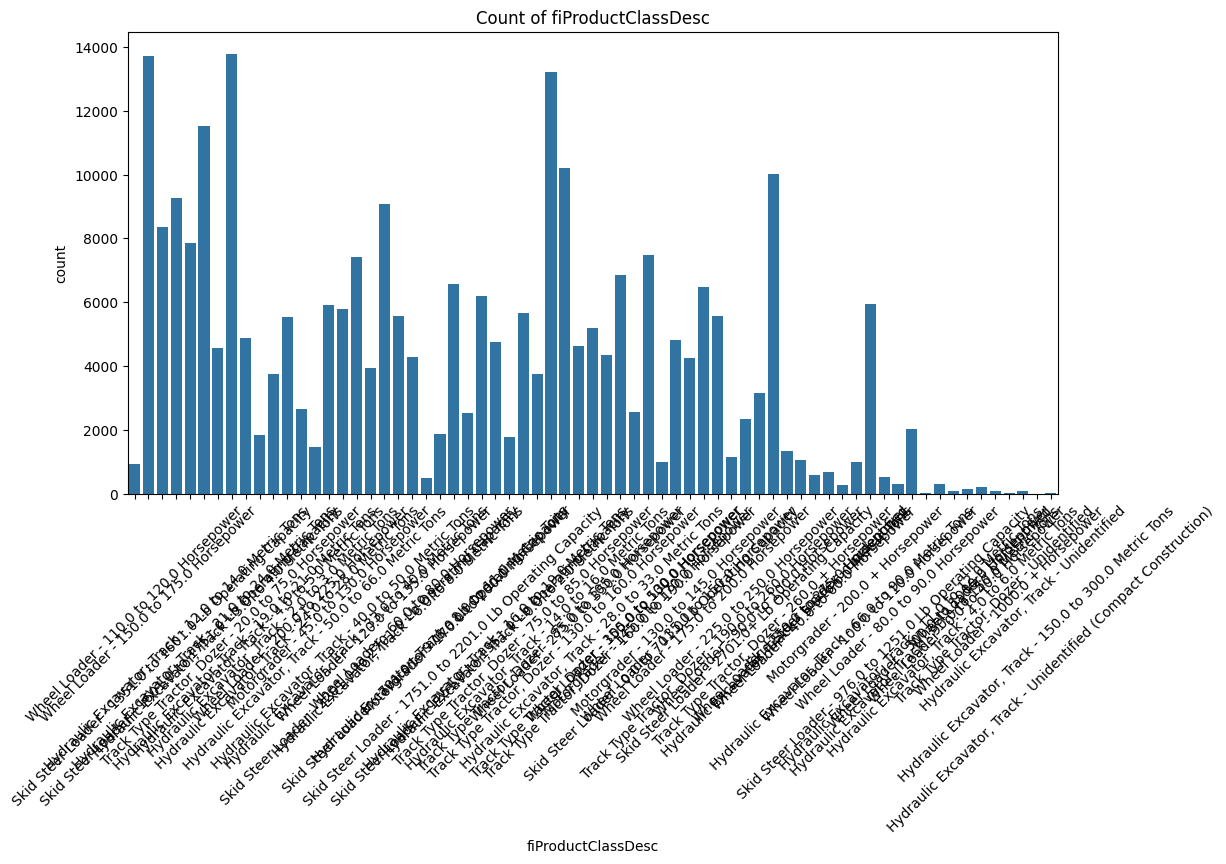

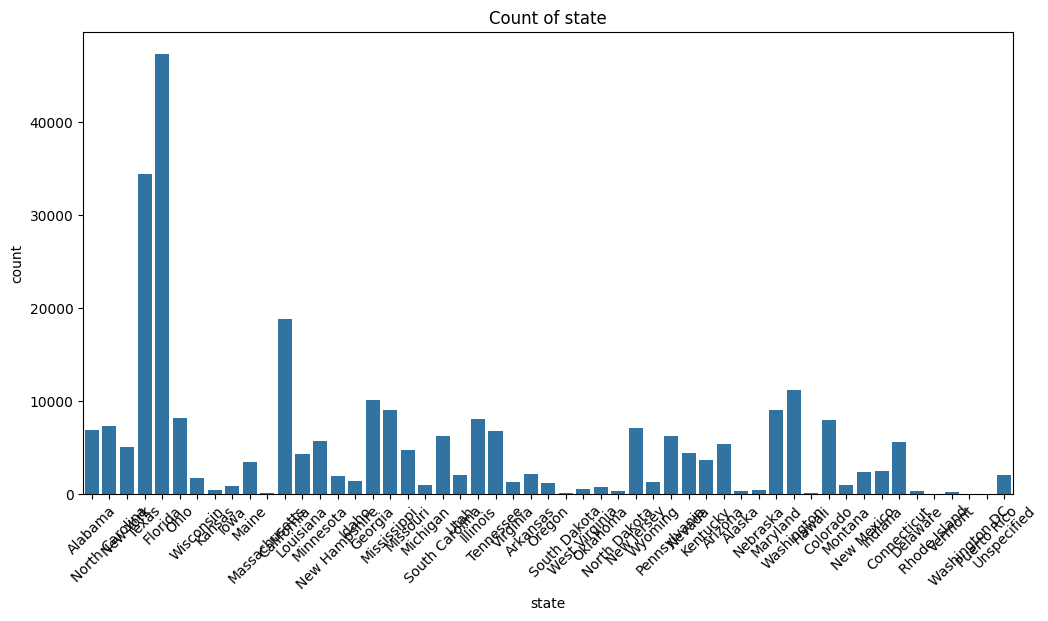

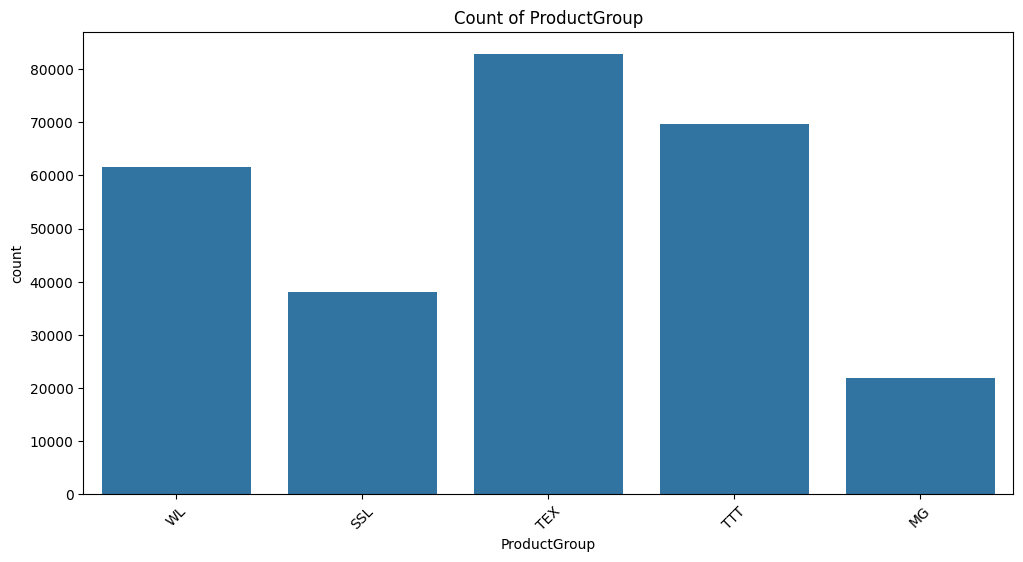

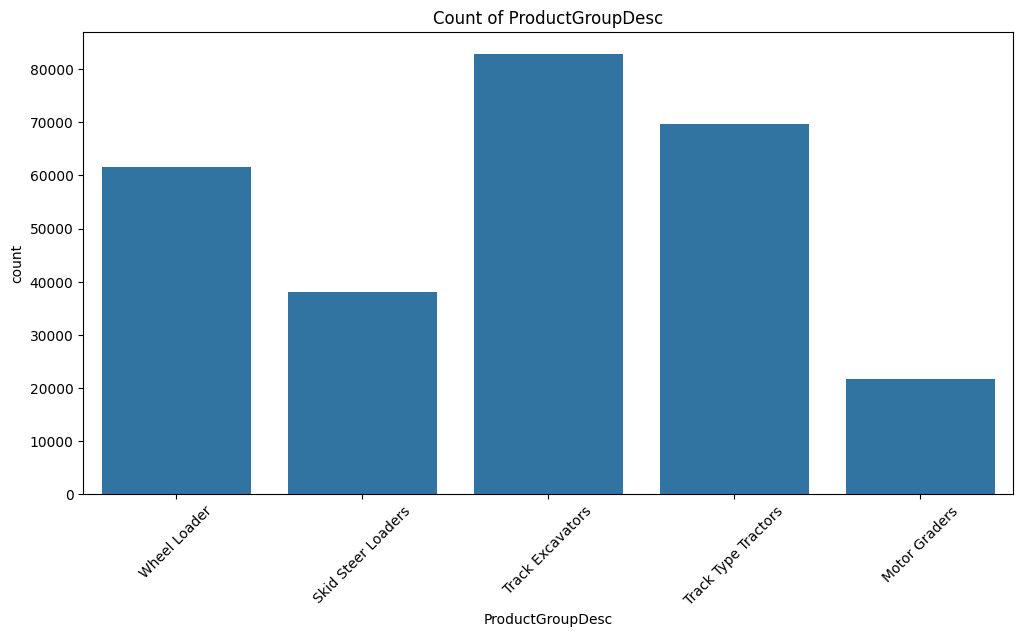

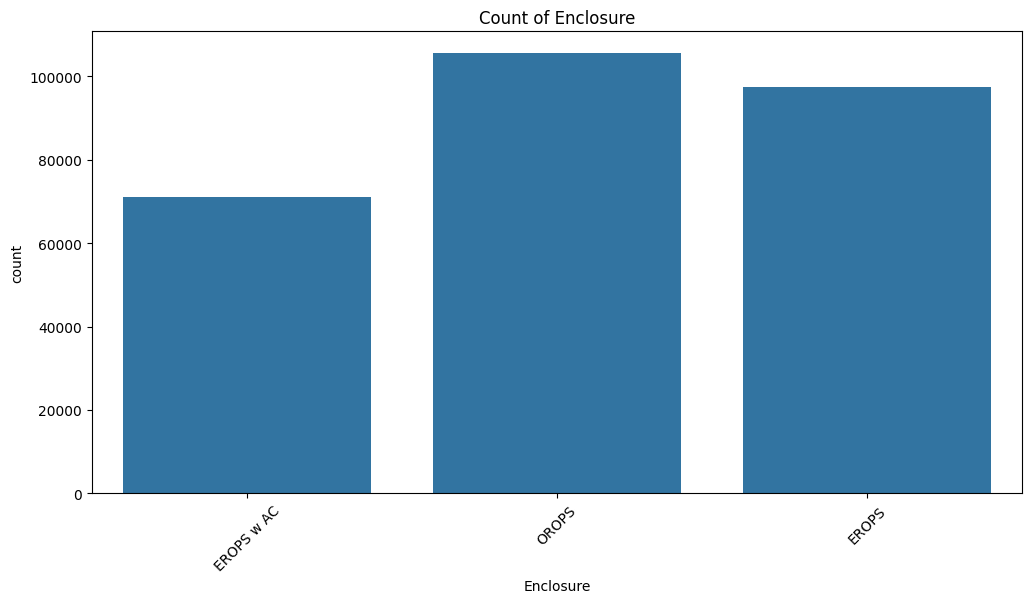

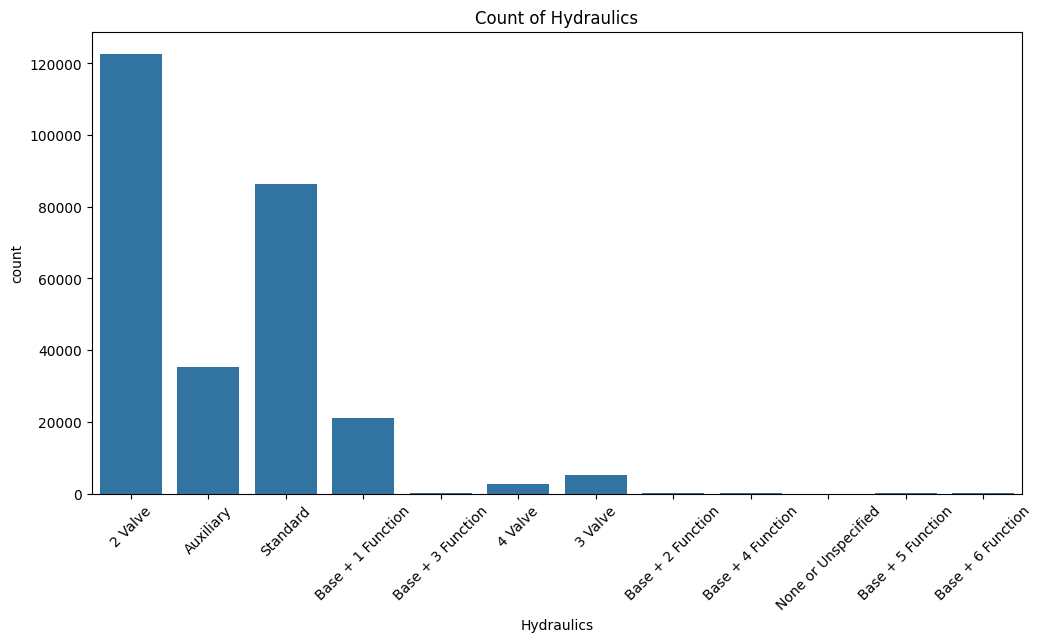

In [71]:
features_to_investigate = ['fiModelDesc', 'fiBaseModel','fiProductClassDesc', 
                           'state', 'ProductGroup', 'ProductGroupDesc',
                            'Enclosure', 'Hydraulics']
for feature in features_to_investigate:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)
    plt.show()


### observe how 'SalePrice' changes over Categorical features.
**there is 

In [72]:
from scipy.stats import f_oneway

for feature in features_to_investigate:
    groups = [df['SalePrice'][df[feature] == category] for category in df[feature].unique()]
    f_statistic, p_value = f_oneway(*groups)
    print(f'{feature}: F-statistic={f_statistic}, p-value={p_value}')


fiModelDesc: F-statistic=180.74554317333113, p-value=0.0
fiBaseModel: F-statistic=127.3859710725142, p-value=0.0
fiProductClassDesc: F-statistic=2921.3140810766413, p-value=0.0
state: F-statistic=88.26333807808274, p-value=0.0
ProductGroup: F-statistic=13625.98607501565, p-value=0.0
ProductGroupDesc: F-statistic=13625.98607501565, p-value=0.0
Enclosure: F-statistic=43732.150481190605, p-value=0.0
Hydraulics: F-statistic=1973.7299980920002, p-value=0.0


### observe how 'SalePrice' changes over Categorical features.
based on the low p-values and high F-statistics and visulization, it seems that all these categorical features are correlated with 'SalePrice.' They show significant variations in 'SalePrice' across different categories, suggesting that these features have an impact on predicting 'SalePrice.'

In [73]:
df.head()

,SalePrice,YearMade,fiModelDesc,fiBaseModel,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Enclosure,Hydraulics,sale_year,sale_month,sale_day,sale_dayofweek
0,66000,2004,521D,521,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,EROPS w AC,2 Valve,2006,11,16,3
1,57000,1996,950FII,950,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,EROPS w AC,2 Valve,2004,3,26,4
2,10000,2001,226,226,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,OROPS,Auxiliary,2004,2,26,3
3,38500,2001,PC120-6E,PC120,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,EROPS w AC,2 Valve,2011,5,19,3
4,11000,2007,S175,S175,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,EROPS,Auxiliary,2009,7,23,3


In [75]:
# encoding my categorical feature with frequency encoder
for feature in features_to_investigate:
    # Frequency encoding
    frequency_encoding = df[feature].value_counts().to_dict()
    
    # Create a new column with the frequency-encoded values
    df[feature + '_freq_encoded'] = df[feature].map(frequency_encoding)

    # Drop the original feature column if needed
    df = df.drop(feature, axis=1)


### some notes
for nominal categorical data the best encodeing is one-hot-encoding but When dealing with a nominal categorical column that has a large number of unique categories (high cardinality), traditional one-hot encoding can lead to a significant increase in the dimensionality of the dataset. This increase in dimensionality may not be desirable for some machine learning models, especially if there are a large number of unique categories.

In such cases, alternative encoding techniques may be considered. we take the frequency encoding because we see in visualization that the frequency is informative.

In [76]:
df.shape

(273964, 14)

In [77]:
df.head()

,SalePrice,YearMade,sale_year,sale_month,sale_day,sale_dayofweek,fiModelDesc_freq_encoded,fiBaseModel_freq_encoded,fiProductClassDesc_freq_encoded,state_freq_encoded,ProductGroup_freq_encoded,ProductGroupDesc_freq_encoded,Enclosure_freq_encoded,Hydraulics_freq_encoded
0,66000,2004,2006,11,16,3,44,58,931,6870,61585,61585,71135,122704
1,57000,1996,2004,3,26,4,1253,6967,13731,7335,61585,61585,71135,122704
2,10000,2001,2004,2,26,3,800,1313,8364,5115,37960,37960,105481,35205
3,38500,2001,2011,5,19,3,22,653,9273,34443,82892,82892,71135,122704
4,11000,2007,2009,7,23,3,1106,1106,7847,5115,37960,37960,97348,35205


In [78]:
df.dtypes

SalePrice                          int64
YearMade                           int64
sale_year                          int32
sale_month                         int32
sale_day                           int32
sale_dayofweek                     int32
fiModelDesc_freq_encoded           int64
fiBaseModel_freq_encoded           int64
fiProductClassDesc_freq_encoded    int64
state_freq_encoded                 int64
ProductGroup_freq_encoded          int64
ProductGroupDesc_freq_encoded      int64
Enclosure_freq_encoded             int64
Hydraulics_freq_encoded            int64
dtype: object

### OH, we have all feature is number 

Keep in mind that normalization is not always required, and its necessity depends on the characteristics of your machine learning model. Some models, like decision trees or random forests, are not sensitive to feature scaling, while others, like support vector machines or k-nearest neighbors, may benefit from normalization.

so we don't go to normalization step because we will use random-forests to do predication.

In [81]:
df.to_csv("Data_Prepaired.csv", index=False)